In [2]:
#Dataset (6.2 million games) https://www.kaggle.com/datasets/arevel/chess-games

#import dependancies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
df = pd.read_csv('lotta_chess_games.csv')
df.head()
#define dataframe of my dataset as 'df'


,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [37]:
#split my dataframe into three seperate groups, low, medium, and high for elo.
low_df = df[df['WhiteElo'] <= 1500]
med_df = df[(df['WhiteElo'] <=2000)&(df['WhiteElo'] >=1500)]
high_df = df[df['WhiteElo'] >= 2000]

<BarContainer object of 50 artists>

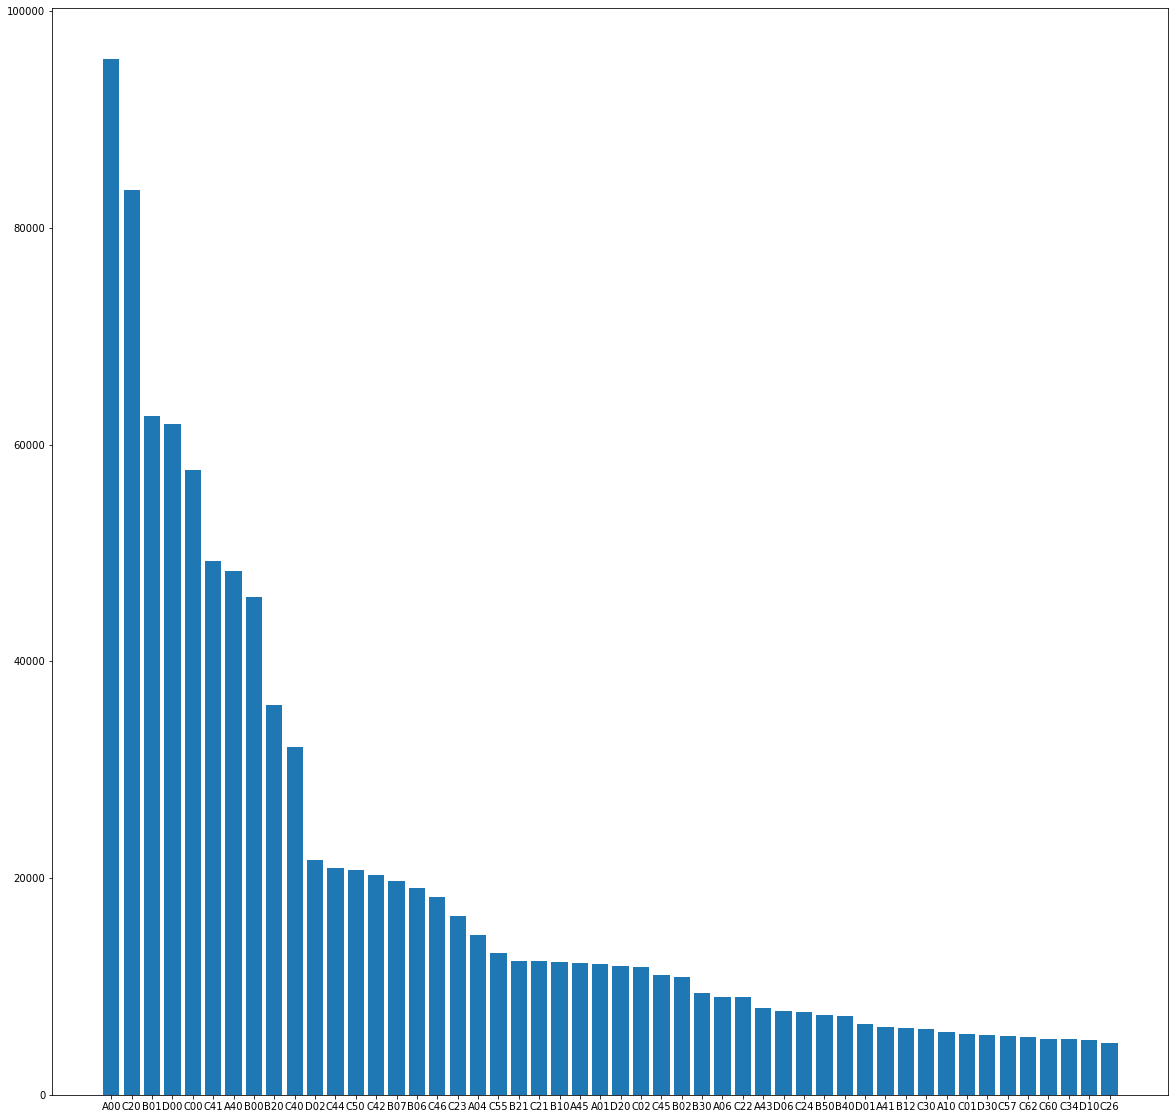

In [74]:

low_df2 = low_df['ECO'].value_counts().rename_axis('opening_code').reset_index(name = 'counts')
med_df2 = med_df['ECO'].value_counts().rename_axis('opening_code').reset_index(name = 'counts')
high_df2 = high_df['ECO'].value_counts().rename_axis('opening_code').reset_index(name = 'counts')

low_df3 = low_df2[low_df2['counts'] > 10000]
med_df3 = med_df2[med_df2['counts'] > 10000]
high_df3 = high_df2[high_df2['counts'] > 10000]

#new dataframes with only openings that have been played over 10000 times

plt.figure(figsize = (20,20))
plt.bar(low_df2['opening_code'].head(50), low_df2['counts'].head(50))




In [75]:
low_df3.head(12312)

,opening_code,counts
0,A00,95541
1,C20,83456
2,B01,62657
3,D00,61874
4,C00,57639
5,C41,49216
6,A40,48374
7,B00,45974
8,B20,35934
9,C40,32065


In [40]:
high_df2.head()

,freq,counts
0,A00,66941
1,A40,47269
2,B01,36428
3,C00,34526
4,A04,32400


In [41]:
med_df2.head()

,freq,counts
0,A00,264902
1,C00,199774
2,A40,197051
3,B01,189958
4,D00,147919


In [ ]:
low_queen_pawn = low_df[low_df['ECO'] == 'A40']
med_queen_pawn = med_df[med_df['ECO'] == 'A40']
high_queen_pawn = high_df[high_df['ECO'] == 'A40']
low_king_pawn = low_df[low_df['ECO'] == 'C20']
med_king_pawn = med_df[med_df['ECO'] == 'C20']
high_king_pawn = high_df[high_df['ECO'] == 'C20']

#defining new dataframes for the two openings

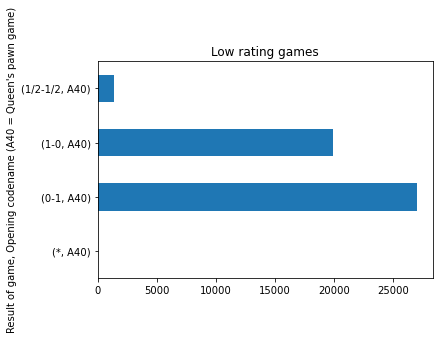

In [59]:
low_queen_pawn_freq = low_queen_pawn.groupby('Result')['ECO'].value_counts()
ax = low_queen_pawn_freq.plot.barh(title = "Low rating games", xlabel = "Result of game, Opening codename (A40 = Queen's pawn game)", ylabel = "Frequency")
#graph



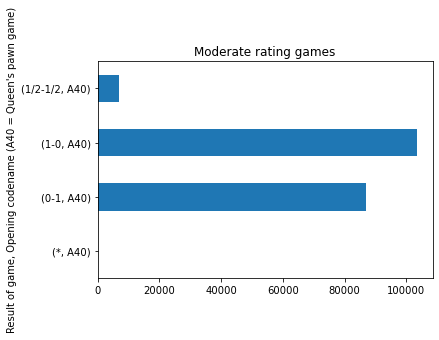

In [60]:
med_queen_pawn_freq = med_queen_pawn.groupby('Result')['ECO'].value_counts()
ax = med_queen_pawn_freq.plot.barh(title = "Moderate rating games", xlabel = "Result of game, Opening codename (A40 = Queen's pawn game)", ylabel = "Frequency")
#graph #2



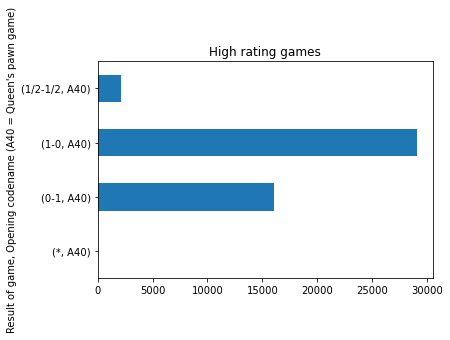

In [61]:
high_queen_pawn_freq = high_queen_pawn.groupby('Result')['ECO'].value_counts()
ax = high_queen_pawn_freq.plot.barh(title = "High rating games", xlabel = "Result of game, Opening codename (A40 = Queen's pawn game)", ylabel = "Frequency")
#graph #3


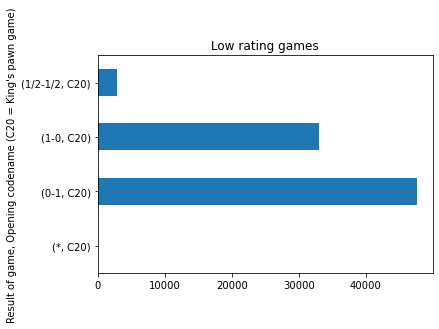

In [62]:
low_king_pawn_freq = low_king_pawn.groupby('Result')['ECO'].value_counts()
ax = low_king_pawn_freq.plot.barh(title = "Low rating games", xlabel = "Result of game, Opening codename (C20 = King's pawn game)", ylabel = "Frequency")
#graph



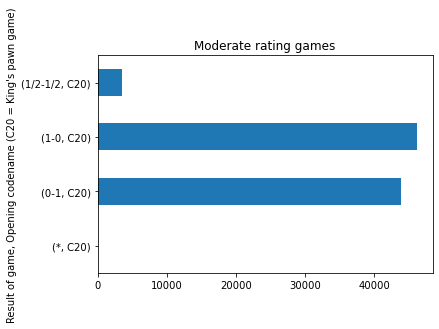

In [63]:
med_king_pawn_freq = med_king_pawn.groupby('Result')['ECO'].value_counts()
ax = med_king_pawn_freq.plot.barh(title = "Moderate rating games", xlabel = "Result of game, Opening codename (C20 = King's pawn game)", ylabel = "Frequency")
#graph


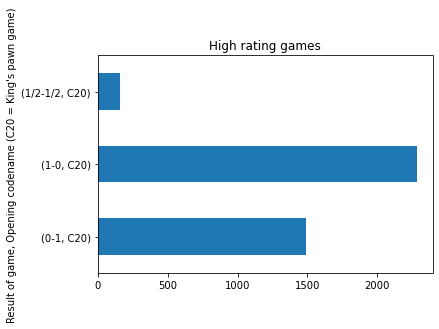

In [64]:
high_king_pawn_freq = high_king_pawn.groupby('Result')['ECO'].value_counts()
ax = high_king_pawn_freq.plot.barh(title = "High rating games", xlabel = "Result of game, Opening codename (C20 = King's pawn game)", ylabel = "Frequency")
#graph 


    Opening played   freq
1              A00  28843
25             A01   2607
49             A02   1026
54             A03    932
18             A04   3806
..             ...    ...
217            E91     10
308            E92      1
345            E93      1
346            E94      1
327            E97      1

[347 rows x 2 columns]


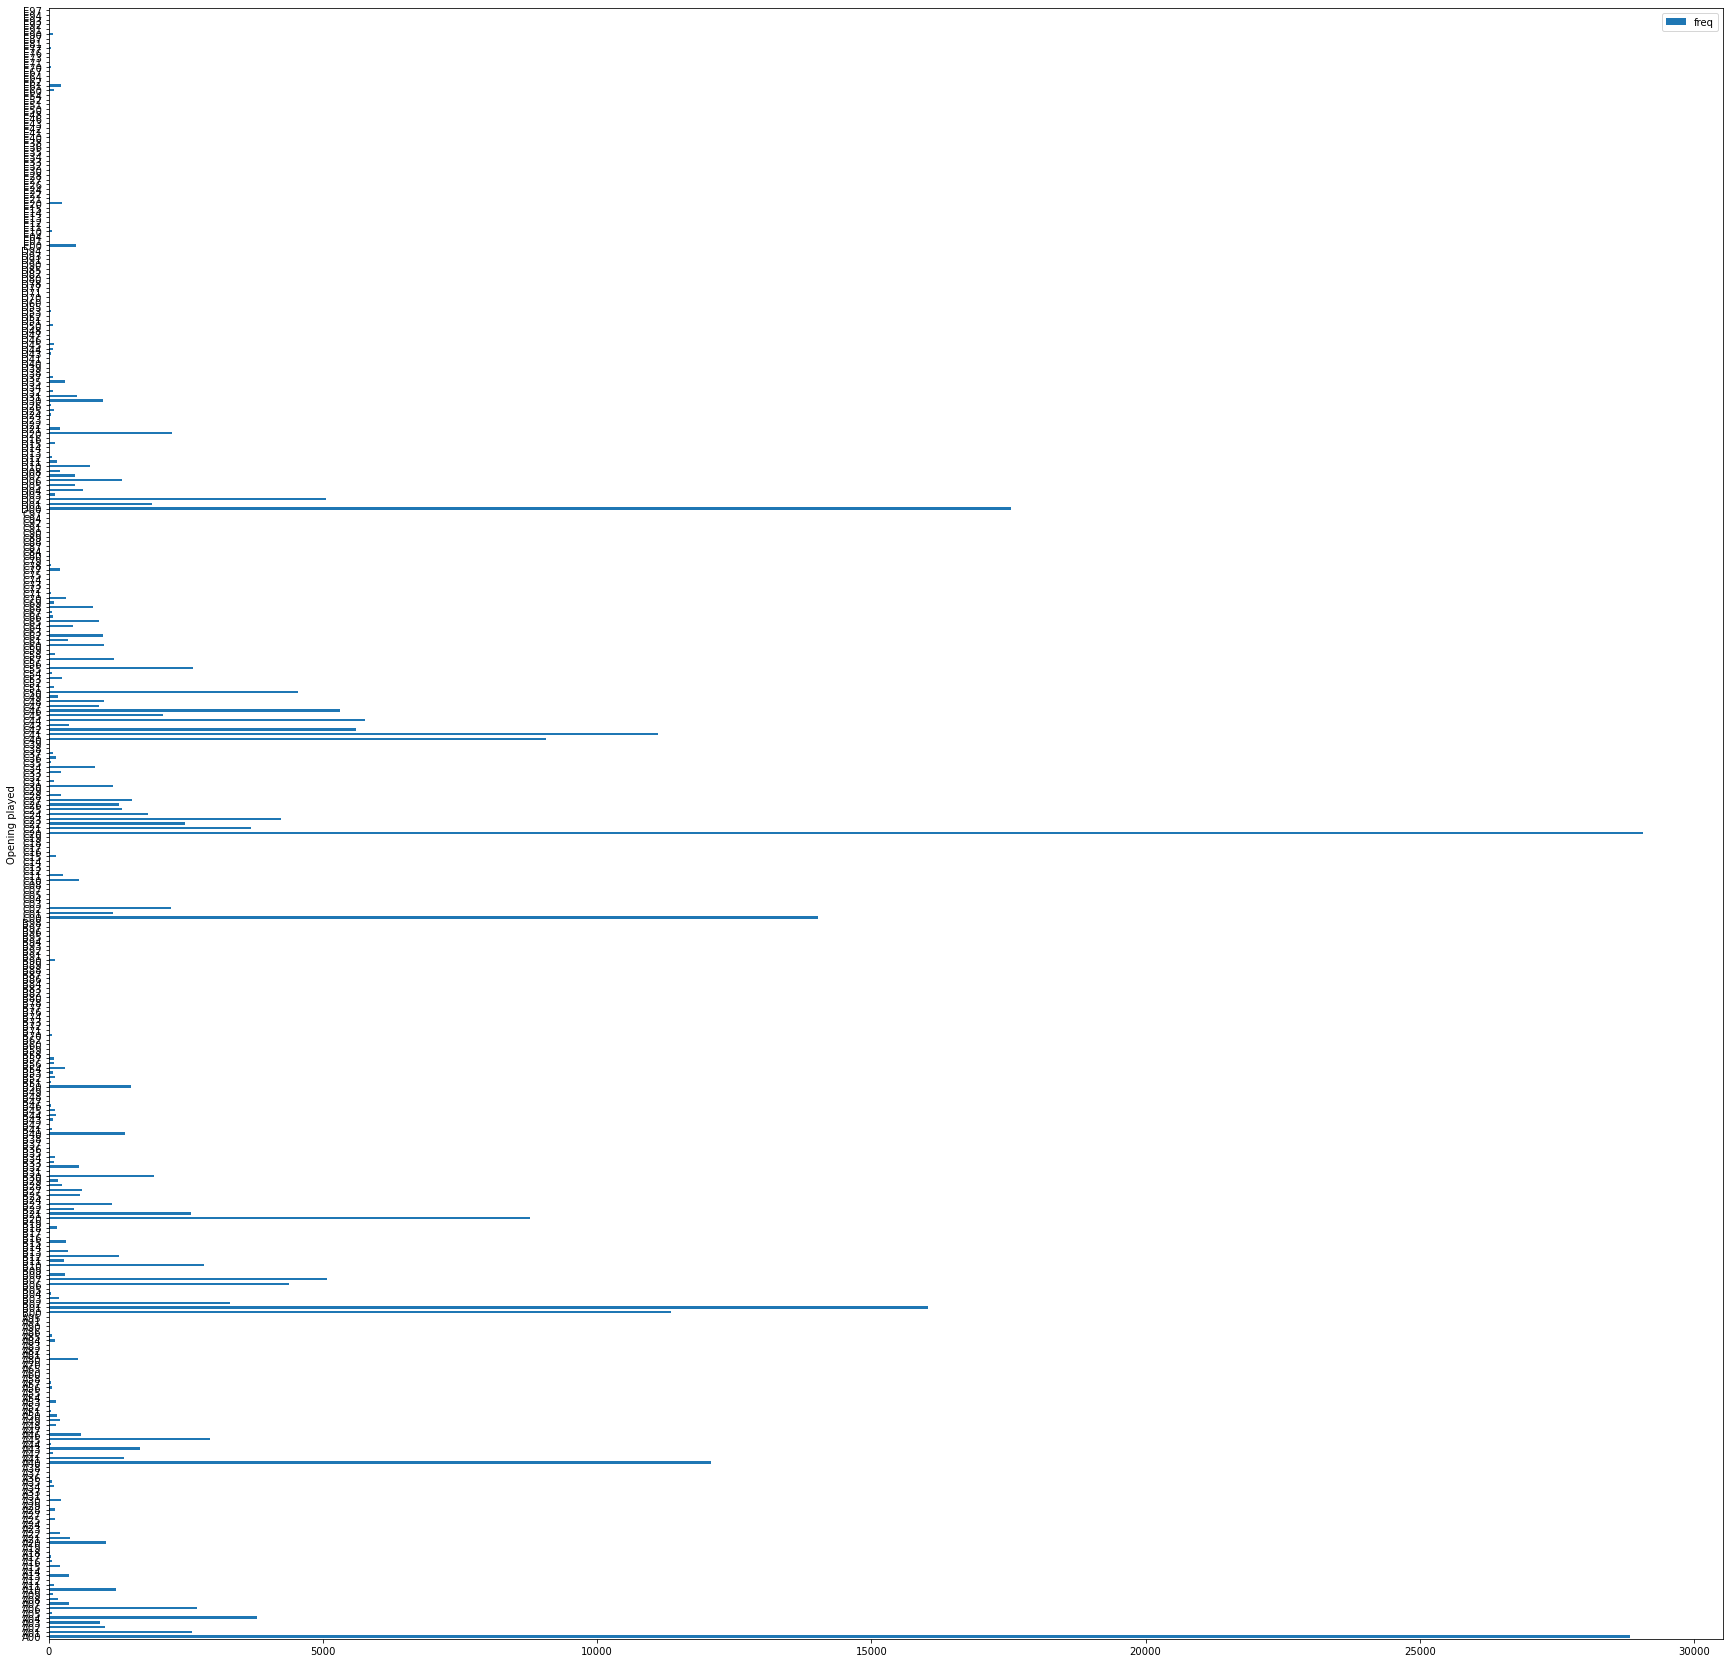

In [32]:
#dont mind this
col = 'ECO' 
col_name = 'Opening played'
low_opening_freq = low_df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
low_opening_freq = low_opening_freq.sort_values(by = col_name)
print(low_opening_freq)
ax = low_opening_freq.plot.barh(x=col_name, y='freq', rot=0, figsize = (30,30))

In [ ]:
df['Result'].value_counts()

In [ ]:
df.columns

In [ ]:
df.describe